# Imporing - Cleaning - Exporting

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
#Importing Movie Titles, Ratings, Users
movies_df = pd.read_csv('../Data/movies.csv')
ratings_df = pd.read_csv('../Data/ratings-full.csv')

In [33]:
#Merging Movies and Ratings
full = movies_df.merge(ratings_df, how = 'right', on = 'movieId')

In [35]:
# Creating a Year column from movie titles and setting year as an integer 
full['year'] = full.title.str.extract('(\d+)')

In [36]:
# Dropping Several null values created from extraction process 
# setting year values as integers
full.dropna(inplace = True)
full.year = full.year.astype(int)

In [37]:
# Filtering for years between 2000 and 2018 
full = full.loc[full.year >= 2000]
full = full.loc[full.year <= 2018]

In [38]:
# Getting rating frequency per movie
freq = full.groupby(full['movieId']).count()

# Creating a series of frequency counts 
frequency = pd.Series(freq.year, name = 'frequency')

# merging frequency series into data
freq_df = full.merge(frequency, left_on = 'movieId', right_index = True)

In [39]:
# Filtering Movies with less than 10 reviews
filtered = freq_df.loc[freq_df['frequency'] >= 50]

## Year Distribution

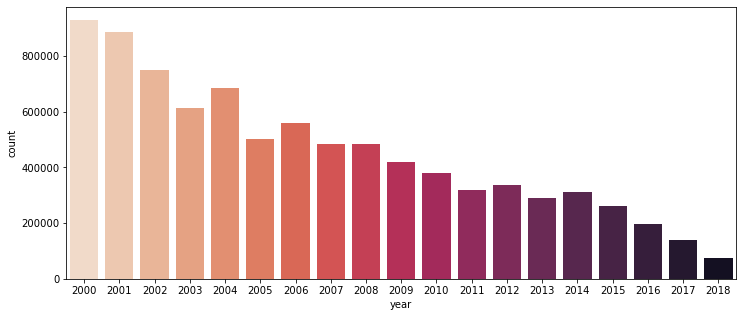

In [40]:
years = filtered.year
plt.figure(figsize = (12, 5))
g = sns.countplot(x = years, palette = 'rocket_r'); 

## Rating Distribution

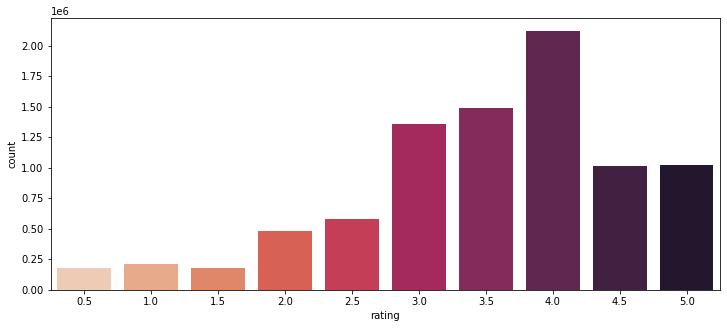

In [41]:
ratings = filtered.rating
plt.figure(figsize = (12, 5))
r = sns.countplot(x = ratings, palette = 'rocket_r')

In [43]:
mini = filtered[['movieId', 'title', 'userId', 'rating']]
mini.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8632942 entries, 23 to 24661912
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   movieId  int64  
 1   title    object 
 2   userId   int64  
 3   rating   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 329.3+ MB


In [50]:
mini.to_csv('../Data/filtered-cleaned')